##Import Necessary Libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

### Step 1 - Merge 12 months data in a single csv file

In [29]:
path="/Users/91823/PROJECTS/MY PROJECTS/Sales_Analysis_Python_Project/Sales_Data"
files_list=os.listdir(path)

combined_data=pd.DataFrame()

for file in files_list:
    df =pd.read_csv("/Users/91823/PROJECTS/MY PROJECTS/Sales_Analysis_Python_Project/Sales_Data/"+file)
    combined_data=pd.concat([combined_data,df])

combined_data.to_csv("combined_data.csv",index=False)
    


### Now we have our new dataframe having all data so use it for next operations


In [34]:
all_data=pd.read_csv("combined_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### CLeaning of a data is necessary

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [54]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

#### drop the rows which have null values

In [56]:
all_data.dropna(inplace=True)

#### some date columns having month = 'or' as we re getting error in converting to int32 so want to clean it

In [71]:
all_data=all_data[all_data['Month']!='Or']

### Step 2 - Add some needed Columns

Month Column

In [75]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Sales Column

In [84]:
#changing the data type to correct datatype because we cant multiply it
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #make float

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


City Column

In [130]:
# use .apply on the series to perform function on address 
def get_city(address):
    return address.split(',')[1]


all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x) )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## Q1 What was the best month for sales ? How much was earned that month ?

<function matplotlib.pyplot.show(close=None, block=None)>

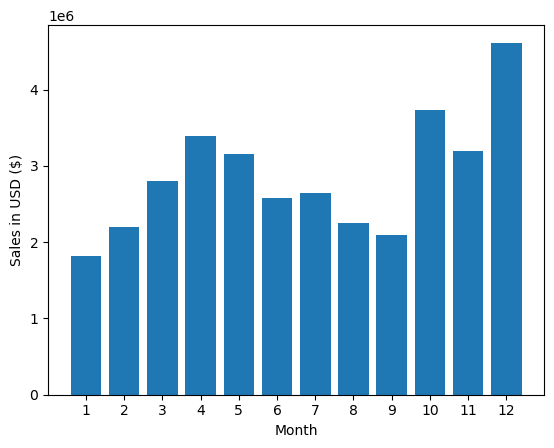

In [108]:
Group_by_Month_sum=all_data.groupby('Month').sum()
months=range(1,13)

plt.bar(months,Group_by_Month_sum['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show

## Q2 Which City had the highest number of sales ?

<function matplotlib.pyplot.show(close=None, block=None)>

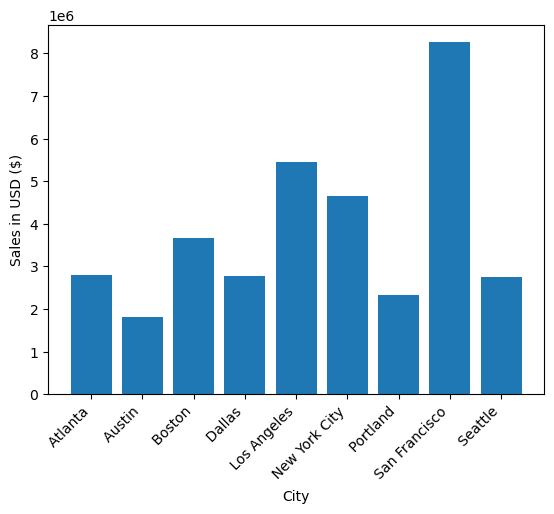

In [177]:
Group_by_city_sum=all_data.groupby('City').sum()
cities=[city for city ,df in all_data.groupby('City')]

plt.bar(cities,Group_by_city_sum['Sales'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

## Q3 Which time is Best to advertise our company to maximize likelihood of customer's buying product

In [190]:
# converting the datatype of Order Date to datetime
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

# extracting hour from Order Date to a new Column Time_Hour
all_data['Time_Hour']=all_data['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time_Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


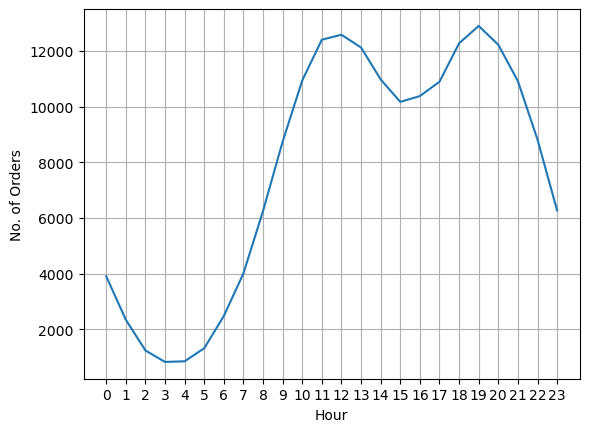

In [204]:
Group_by_hour_count=all_data.groupby('Time_Hour').count()
hours=[ hour for hour , df in all_data.groupby('Time_Hour')]

plt.plot(hours,Group_by_hour_count['Order ID'])
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.grid('on')
plt.xticks(hours)
plt.show()


## Result we should display adverise at 12'o clock or 19'o clock according to the graph

## Q4 What products are most often sold together ?

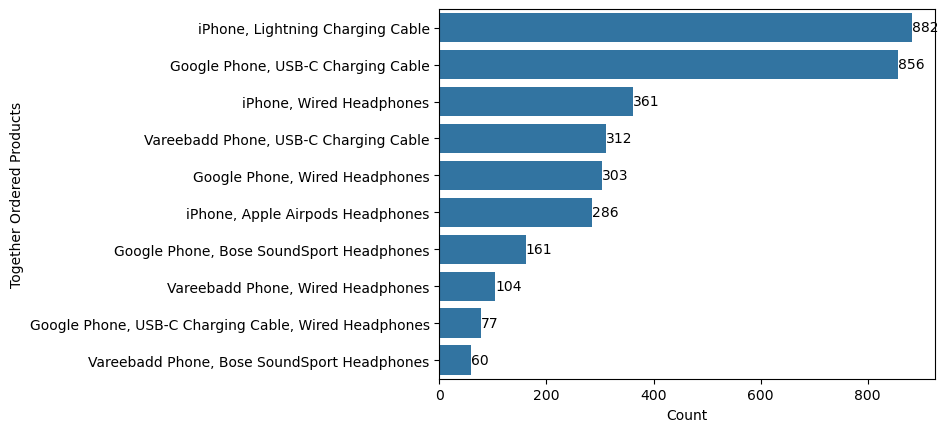

In [276]:
new_df=all_data[all_data['Order ID'].duplicated(keep=False)].copy()

new_df['Together Ordered Products'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
new_df = new_df[['Order ID','Together Ordered Products']].drop_duplicates()

products_vs_Count=new_df.groupby(['Together Ordered Products']).count()
products_vs_Count=products_vs_Count.rename(columns={'Order ID':'Count'})
products_vs_Count.head(50)

top10=products_vs_Count.sort_values('Count',ascending=False).head(10).reset_index()
plot1=sns.barplot(x='Count',y='Together Ordered Products',data=top10)

for container in plot1.containers:
    plot1.bar_label(container)

plt.show()
